### Book Price Prediction 

#### We explore a big database of books. 
#### Books of different genres, from thousands of authors. 
#### We are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. 
- Training set: 6237 records 
- Test set: 1560 records 

FEATURES: 
- Title: The title of the book, Author: The author(s) of the book
- Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)
- Reviews: The customer reviews about the book
- Ratings: The customer ratings of the book
- Synopsis: The synopsis of the book
- Genre: The genre the book belongs to
- BookCategory: The department the book is usually available at
- Price: The price of the book (Target variable)

### Importing Libraries 

In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [2]:
pd.options.display.max_rows= None
pd.options.display.max_columns= None

### Importing the Data 

In [3]:
train = pd.read_excel('Data_Train.xlsx')
train.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
test = pd.read_excel('Data_Test.xlsx')
test.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [5]:
# The test data and train data match except the target variable- Price, that we need to predict. 

### Exploring the Dataset 

In [6]:
train.shape

(6237, 9)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
# We have 9 features out of which 8 are categorical and 1 is numerical

In [9]:
train.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [10]:
# There are no missing values in the data

In [11]:
train.describe(include='object').T

,count,unique,top,freq
Title,6237,5568,Casino Royale: James Bond 007 (Vintage),4
Author,6237,3679,Agatha Christie,69
Edition,6237,3370,"Paperback,– 5 Oct 2017",48
Reviews,6237,36,5.0 out of 5 stars,1375
Ratings,6237,342,1 customer review,1040
Synopsis,6237,5549,A Tinkle Double Digest is two Tinkle Digests i...,8
Genre,6237,345,Action & Adventure (Books),947
BookCategory,6237,11,Action & Adventure,818


In [12]:
# The top title is Game of Thrones and the top author is Agatha Christie
# Most of the books have a 5 star rating 
# The Genre ocurring the most is Action and Adventure 
# The top book catgeory is Action and Adventure 

### Data Processing 

Here we will:
- Clean the Data 
- Create new Features
- Encode and Scale the Data

In [13]:
df1= train.copy()

In [14]:
df1.Edition.str.split(',–')[0]

['Paperback', ' 10 Mar 2016']

In [15]:
def edition_split(x):
    return x.split(',–')[0]

In [16]:
df1['Cover_Type']= df1.Edition.map(edition_split)

In [129]:
test['Cover_Type']= test.Edition.map(edition_split)

In [17]:
df1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Cover_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover


In [18]:
df1.Cover_Type.value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Plastic Comb                1
Library Binding             1
(German),Paperback          1
(Kannada),Paperback         1
(French),Paperback          1
Perfect Paperback           1
(Spanish),Paperback         1
Board book                  1
Leather Bound               1
Product Bundle              1
Name: Cover_Type, dtype: int64

In [19]:
def cv_type(x):
    lst= ['Paperback', 'Hardcover', 'Mass Market Paperback']
    if x not in lst:
        return 'Others'
    else:
        return x
    

In [20]:
df1.Cover_Type= df1.Cover_Type.map(cv_type)

In [130]:
test.Cover_Type= test.Cover_Type.map(cv_type)

In [21]:
df1.Cover_Type.value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Others                     66
Name: Cover_Type, dtype: int64

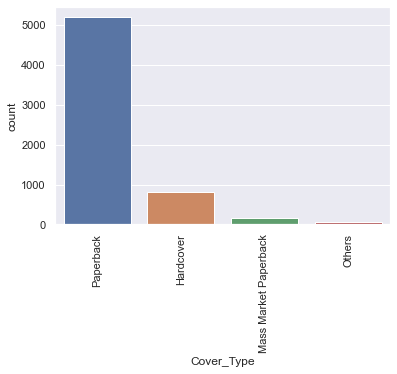

In [22]:
sns.countplot(df1.Cover_Type)
plt.xticks(rotation=90)
plt.show()

In [23]:
df1.Reviews.str.split()[1][0]

'3.9'

In [24]:
def rev_split(x):
    return x.split()[0]

In [25]:
df1.Reviews= df1.Reviews.map(rev_split)

In [132]:
test.Reviews= test.Reviews.map(rev_split)

In [26]:
df1.Reviews.unique()

array(['4.0', '3.9', '4.8', '4.1', '5.0', '4.5', '4.4', '4.7', '4.2',
       '4.9', '3.5', '3.8', '4.3', '3.1', '4.6', '2.0', '3.7', '3.2',
       '2.6', '2.8', '3.4', '2.9', '3.3', '3.0', '2.5', '1.0', '3.6',
       '2.7', '1.5', '2.3', '1.7', '2.2', '1.4', '2.4', '1.6', '2.1'],
      dtype=object)

In [27]:
df1.Ratings.str.split()[90][0]

'7'

In [28]:
df1.Ratings= df1.Ratings.map(rev_split)

In [134]:
test.Ratings= test.Ratings.map(rev_split)

In [29]:
df1.rename(columns={'Ratings':'Customer_Reviews'}, inplace=True)

In [135]:
test.rename(columns={'Ratings':'Customer_Reviews'}, inplace=True)

In [30]:
df1.Edition.str.split()[0][-1]

'2016'

In [31]:
def ed_year(x):
    return x.split()[-1]

In [32]:
df1['Edition_Year']=df1.Edition.map(ed_year)

In [136]:
test['Edition_Year']=test.Edition.map(ed_year)

In [33]:
df1.Edition_Year.unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'Import', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', '1980', 'Unabridged', '1979', 'Print',
       '1960', '1970', '1975', '1905', '1900', 'Audiobook', '1961',
       '1925', '1973'], dtype=object)

In [34]:
df1.Edition_Year.value_counts().index[0]    #Imputing the string years with mode as there are very few of them

'2018'

In [138]:
test.Edition_Year.value_counts().index[0]

'2018'

In [35]:
df1.loc[df1['Edition_Year'].str.isalpha(), 'Edition_Year']='2018'

In [145]:
test.loc[test['Edition_Year'].str.isalpha(), 'Edition_Year']='2018'

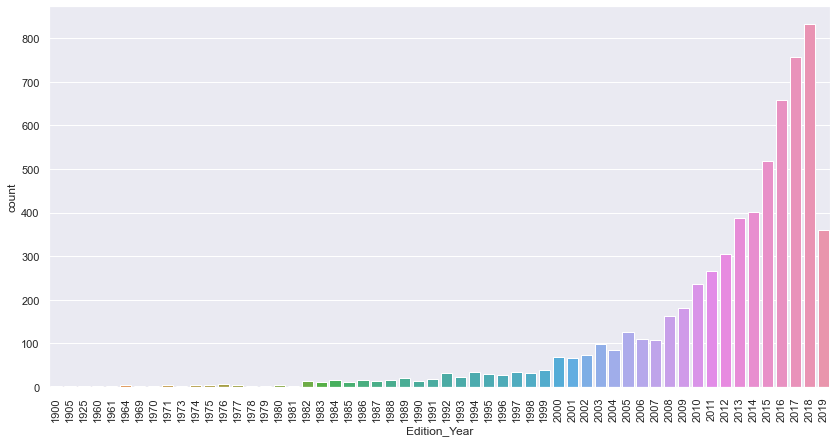

In [36]:
plt.figure(figsize=[14,7])
sns.countplot(df1.Edition_Year.sort_values())
plt.xticks(rotation=90)
plt.show()

In [37]:
df1.Edition_Year= df1.Edition_Year.astype(int)

In [147]:
test.Edition_Year= test.Edition_Year.astype(int)

In [38]:
df1['Edition_Year_Cat']= pd.cut(df1.Edition_Year, bins=[1899, 1981, 1999, 2010, 2020], 
                               labels=['Very Old', 'Old', 'Mid', 'New'])

In [148]:
test['Edition_Year_Cat']= pd.cut(test.Edition_Year, bins=[1899, 1981, 1999, 2010, 2020], 
                               labels=['Very Old', 'Old', 'Mid', 'New'])

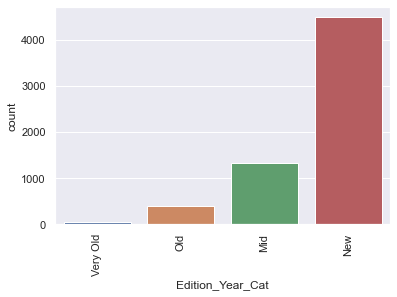

In [39]:
sns.countplot(df1.Edition_Year_Cat.sort_values())
plt.xticks(rotation=90)
plt.show()

In [40]:
df1.Reviews=df1.Reviews.astype(float) 

In [150]:
test.Reviews=test.Reviews.astype(float) 

In [41]:
df1.rename(columns={'Reviews':'Ratings'}, inplace=True)

In [151]:
test.rename(columns={'Reviews':'Ratings'}, inplace=True)

In [42]:
df1.head()

,Title,Author,Edition,Ratings,Customer_Reviews,Synopsis,Genre,BookCategory,Price,Cover_Type,Edition_Year,Edition_Year_Cat
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016,New
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012,New
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982,Old
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017,New
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006,Mid


In [152]:
test.head()

,Title,Author,Edition,Ratings,Customer_Reviews,Synopsis,Genre,BookCategory,Cover_Type,Edition_Year,Edition_Year_Cat
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",Mass Market Paperback,1986,Old
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",Paperback,2018,New
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,Paperback,2011,New
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",Paperback,2016,New
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",Paperback,2011,New


In [43]:
df1.Ratings.value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
4.9      75
3.4      75
3.3      57
1.0      49
3.1      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
1.6       1
2.1       1
1.7       1
Name: Ratings, dtype: int64

In [44]:
df1.Customer_Reviews.value_counts()

1        1040
2         708
3         491
4         355
5         300
6         222
8         190
7         187
9         145
10        142
11        122
12        110
15        101
13        100
16        100
14         81
17         66
20         64
19         60
22         58
18         53
30         48
26         45
21         39
29         38
33         37
27         36
32         36
37         36
35         33
24         33
25         32
23         31
28         30
38         25
74         24
31         24
34         22
49         22
42         22
41         21
45         20
36         20
50         20
52         19
40         18
43         17
76         15
62         15
46         14
54         14
39         13
95         13
56         13
48         13
53         12
63         12
57         12
44         12
55         11
70         11
80         11
60         10
64          9
66          9
69          9
61          8
67          8
84          8
59          8
98          8
68    

In [55]:
x='1,203'
x.split(',')
x[0]+x[2:]

'1203'

In [59]:
lst= []
for i in df1.Customer_Reviews:
    if ',' in i:
        i.split(',')
        lst.append(i[0]+i[2:])
    else:
        lst.append(i)

In [153]:
lst_1= []
for i in test.Customer_Reviews:
    if ',' in i:
        i.split(',')
        lst_1.append(i[0]+i[2:])
    else:
        lst_1.append(i)

In [64]:
df1['Reviews']=lst

In [154]:
test['Reviews']=lst_1

In [67]:
df1.Reviews= df1.Reviews.astype(int)

In [155]:
test.Reviews= test.Reviews.astype(int)

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

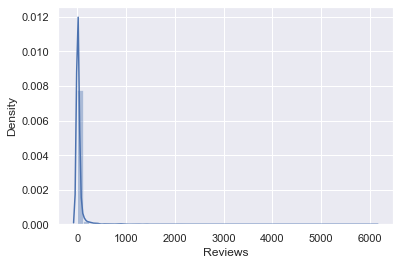

In [69]:
sns.distplot(df1.Reviews)

In [70]:
df1.head()

,Title,Author,Edition,Ratings,Customer_Reviews,Synopsis,Genre,BookCategory,Price,Cover_Type,Edition_Year,Edition_Year_Cat,Reviews
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016,New,8
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012,New,14
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982,Old,6
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017,New,13
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006,Mid,1


In [73]:
df1.Genre.nunique()

345

In [76]:
df1.BookCategory.unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [79]:
genres= df1.Genre.value_counts().head(25).index

In [157]:
genres_t= test.Genre.value_counts().head(25).index

In [80]:
def genre_cat(x):
    if x not in genres:
        return 'Others'
    else:
        return x

In [81]:
df1['Genre_Cat']=df1.Genre.map(genre_cat)

In [158]:
test['Genre_Cat']=test.Genre.map(genre_cat)

In [83]:
df1.Genre_Cat.nunique()

26

In [159]:
test.Genre_Cat.nunique()

26

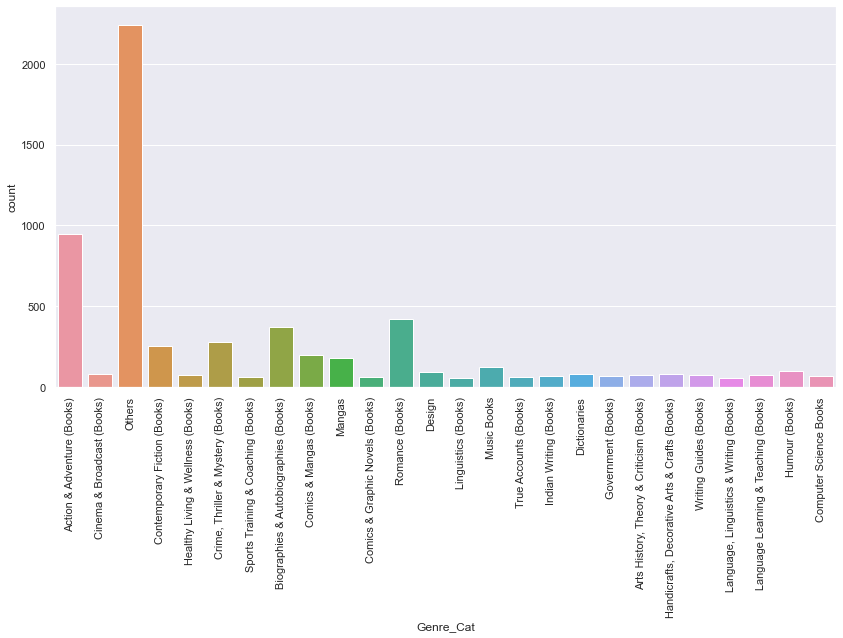

In [84]:
plt.figure(figsize=[14,7])
sns.countplot(df1.Genre_Cat)
plt.xticks(rotation=90)
plt.show()

In [85]:
df1.BookCategory.value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [86]:
df1['Publish_Recency']= 2020-df1.Edition_Year

In [160]:
test['Publish_Recency']= 2020-test.Edition_Year

In [88]:
df1.columns

Index(['Title', 'Author', 'Edition', 'Ratings', 'Customer_Reviews', 'Synopsis',
       'Genre', 'BookCategory', 'Price', 'Cover_Type', 'Edition_Year',
       'Edition_Year_Cat', 'Reviews', 'Genre_Cat', 'Publish_Recency'],
      dtype='object')

In [98]:
df1.head()

,Title,Author,Edition,Ratings,Customer_Reviews,Synopsis,Genre,BookCategory,Price,Cover_Type,Edition_Year,Edition_Year_Cat,Reviews,Genre_Cat,Publish_Recency
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016,New,8,Action & Adventure (Books),4
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012,New,14,Cinema & Broadcast (Books),8
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982,Old,6,Others,38
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017,New,13,Contemporary Fiction (Books),3
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006,Mid,1,Others,14


In [99]:
df2_n= df1.drop(['Title', 'Author', 'Edition', 'Customer_Reviews', 'Synopsis','Genre', 'Edition_Year'], axis=1)

In [161]:
test_n= test.drop(['Title', 'Author', 'Edition', 'Customer_Reviews', 'Synopsis','Genre', 'Edition_Year'], axis=1)

In [100]:
df2_n.head()

,Ratings,BookCategory,Price,Cover_Type,Edition_Year_Cat,Reviews,Genre_Cat,Publish_Recency
0,4.0,Action & Adventure,220.00,Paperback,New,8,Action & Adventure (Books),4
1,3.9,"Biographies, Diaries & True Accounts",202.93,Paperback,New,14,Cinema & Broadcast (Books),8
2,4.8,Humour,299.00,Paperback,Old,6,Others,38
3,4.1,"Crime, Thriller & Mystery",180.00,Paperback,New,13,Contemporary Fiction (Books),3
4,5.0,"Arts, Film & Photography",965.62,Hardcover,Mid,1,Others,14


In [162]:
test_n.head()

,Ratings,BookCategory,Cover_Type,Edition_Year_Cat,Reviews,Genre_Cat,Publish_Recency
0,4.4,"Crime, Thriller & Mystery",Mass Market Paperback,Old,960,Others,34
1,5.0,"Computing, Internet & Digital Media",Paperback,New,1,Others,2
2,5.0,Romance,Paperback,New,4,Romance (Books),9
3,4.1,"Computing, Internet & Digital Media",Paperback,New,11,Others,4
4,4.4,"Language, Linguistics & Writing",Paperback,New,9,Linguistics (Books),9


In [101]:
df3= df2_n.drop('Price', axis=1)

#### Scaling the Data 

In [102]:
df_cat= df3.select_dtypes(exclude=np.number)

In [163]:
test_cat= test_n.select_dtypes(exclude=np.number)

In [103]:
df_num= df3.select_dtypes(include=np.number)

In [164]:
test_num= test_n.select_dtypes(include=np.number)

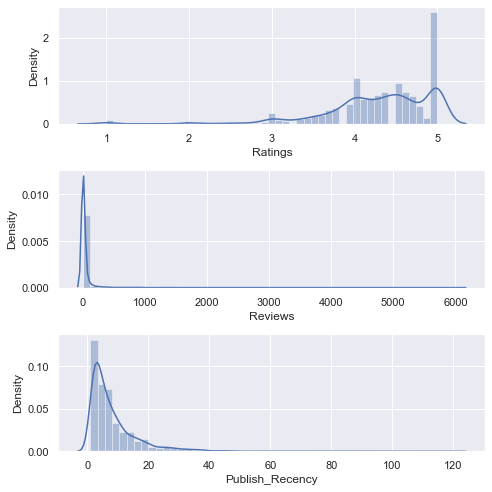

In [110]:
plt.figure(figsize=[7,7])
c=1
for i in df_num:
    plt.subplot(3,1,c)
    sns.distplot(df3[i])
    c+=1
plt.tight_layout()
plt.show()

In [112]:
# Data is skewed so we use power transformer

In [167]:
pt= PowerTransformer()

df_pt= pd.DataFrame(pt.fit_transform(df_num), columns=df_num.columns)

In [166]:
pt= PowerTransformer()

test_pt= pd.DataFrame(pt.fit_transform(test_num), columns=test_num.columns)

In [116]:
sc= StandardScaler()

df_sc= pd.DataFrame(sc.fit_transform(df_pt), columns=df_pt.columns)

In [168]:
sc= StandardScaler()

test_sc= pd.DataFrame(sc.fit_transform(test_pt), columns=test_pt.columns)

In [117]:
dummy= pd.get_dummies(df_cat, drop_first=True)
dummy.head()

,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Cover_Type_Mass Market Paperback,Cover_Type_Others,Cover_Type_Paperback,Edition_Year_Cat_Old,Edition_Year_Cat_Mid,Edition_Year_Cat_New,"Genre_Cat_Arts History, Theory & Criticism (Books)",Genre_Cat_Biographies & Autobiographies (Books),Genre_Cat_Cinema & Broadcast (Books),Genre_Cat_Comics & Graphic Novels (Books),Genre_Cat_Comics & Mangas (Books),Genre_Cat_Computer Science Books,Genre_Cat_Contemporary Fiction (Books),"Genre_Cat_Crime, Thriller & Mystery (Books)",Genre_Cat_Design,Genre_Cat_Dictionaries,Genre_Cat_Government (Books),"Genre_Cat_Handicrafts, Decorative Arts & Crafts (Books)",Genre_Cat_Healthy Living & Wellness (Books),Genre_Cat_Humour (Books),Genre_Cat_Indian Writing (Books),Genre_Cat_Language Learning & Teaching (Books),"Genre_Cat_Language, Linguistics & Writing (Books)",Genre_Cat_Linguistics (Books),Genre_Cat_Mangas,Genre_Cat_Music Books,Genre_Cat_Others,Genre_Cat_Romance (Books),Genre_Cat_Sports Training & Coaching (Books),Genre_Cat_True Accounts (Books),Genre_Cat_Writing Guides (Books)
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [169]:
dummy_test= pd.get_dummies(test_cat, drop_first=True)
dummy_test.head()

,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Cover_Type_Mass Market Paperback,Cover_Type_Others,Cover_Type_Paperback,Edition_Year_Cat_Old,Edition_Year_Cat_Mid,Edition_Year_Cat_New,"Genre_Cat_Arts History, Theory & Criticism (Books)",Genre_Cat_Biographies & Autobiographies (Books),Genre_Cat_Cinema & Broadcast (Books),Genre_Cat_Comics & Graphic Novels (Books),Genre_Cat_Comics & Mangas (Books),Genre_Cat_Computer Science Books,Genre_Cat_Contemporary Fiction (Books),"Genre_Cat_Crime, Thriller & Mystery (Books)",Genre_Cat_Design,Genre_Cat_Dictionaries,Genre_Cat_Government (Books),"Genre_Cat_Handicrafts, Decorative Arts & Crafts (Books)",Genre_Cat_Healthy Living & Wellness (Books),Genre_Cat_Humour (Books),Genre_Cat_Indian Writing (Books),Genre_Cat_Language Learning & Teaching (Books),"Genre_Cat_Language, Linguistics & Writing (Books)",Genre_Cat_Linguistics (Books),Genre_Cat_Mangas,Genre_Cat_Music Books,Genre_Cat_Others,Genre_Cat_Romance (Books),Genre_Cat_Sports Training & Coaching (Books),Genre_Cat_True Accounts (Books),Genre_Cat_Writing Guides (Books)
0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [118]:
df_sc.reset_index(drop=True, inplace=True)
dummy.reset_index(drop=True, inplace=True)

In [170]:
test_sc.reset_index(drop=True, inplace=True)
dummy_test.reset_index(drop=True, inplace=True)

In [123]:
df_final= pd.concat([df_sc, dummy], axis=1)
df_final.head()

,Ratings,Reviews,Publish_Recency,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Cover_Type_Mass Market Paperback,Cover_Type_Others,Cover_Type_Paperback,Edition_Year_Cat_Old,Edition_Year_Cat_Mid,Edition_Year_Cat_New,"Genre_Cat_Arts History, Theory & Criticism (Books)",Genre_Cat_Biographies & Autobiographies (Books),Genre_Cat_Cinema & Broadcast (Books),Genre_Cat_Comics & Graphic Novels (Books),Genre_Cat_Comics & Mangas (Books),Genre_Cat_Computer Science Books,Genre_Cat_Contemporary Fiction (Books),"Genre_Cat_Crime, Thriller & Mystery (Books)",Genre_Cat_Design,Genre_Cat_Dictionaries,Genre_Cat_Government (Books),"Genre_Cat_Handicrafts, Decorative Arts & Crafts (Books)",Genre_Cat_Healthy Living & Wellness (Books),Genre_Cat_Humour (Books),Genre_Cat_Indian Writing (Books),Genre_Cat_Language Learning & Teaching (Books),"Genre_Cat_Language, Linguistics & Writing (Books)",Genre_Cat_Linguistics (Books),Genre_Cat_Mangas,Genre_Cat_Music Books,Genre_Cat_Others,Genre_Cat_Romance (Books),Genre_Cat_Sports Training & Coaching (Books),Genre_Cat_True Accounts (Books),Genre_Cat_Writing Guides (Books)
0,-0.688861,0.138231,-0.395037,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.834876,0.526742,0.438923,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.853798,-0.076231,2.111212,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.533420,0.477727,-0.740424,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.359627,-1.427835,1.082477,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [124]:
df_final.shape

(6237, 44)

In [171]:
test_final= pd.concat([test_sc, dummy_test], axis=1)
test_final.head()

,Ratings,Reviews,Publish_Recency,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Cover_Type_Mass Market Paperback,Cover_Type_Others,Cover_Type_Paperback,Edition_Year_Cat_Old,Edition_Year_Cat_Mid,Edition_Year_Cat_New,"Genre_Cat_Arts History, Theory & Criticism (Books)",Genre_Cat_Biographies & Autobiographies (Books),Genre_Cat_Cinema & Broadcast (Books),Genre_Cat_Comics & Graphic Novels (Books),Genre_Cat_Comics & Mangas (Books),Genre_Cat_Computer Science Books,Genre_Cat_Contemporary Fiction (Books),"Genre_Cat_Crime, Thriller & Mystery (Books)",Genre_Cat_Design,Genre_Cat_Dictionaries,Genre_Cat_Government (Books),"Genre_Cat_Handicrafts, Decorative Arts & Crafts (Books)",Genre_Cat_Healthy Living & Wellness (Books),Genre_Cat_Humour (Books),Genre_Cat_Indian Writing (Books),Genre_Cat_Language Learning & Teaching (Books),"Genre_Cat_Language, Linguistics & Writing (Books)",Genre_Cat_Linguistics (Books),Genre_Cat_Mangas,Genre_Cat_Music Books,Genre_Cat_Others,Genre_Cat_Romance (Books),Genre_Cat_Sports Training & Coaching (Books),Genre_Cat_True Accounts (Books),Genre_Cat_Writing Guides (Books)
0,-0.031047,2.195774,2.046418,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.315675,-1.390723,-1.195503,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.315675,-0.327721,0.572636,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.552159,0.432690,-0.398114,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.031047,0.291536,0.572636,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [172]:
test_final.shape

(1560, 44)

### Modelling 

In [173]:
X= df_final
y= df2['Price']

In [174]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(X, y, test_size=0.20, random_state=10)

In [175]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4989, 44)
(1248, 44)
(4989,)
(1248,)


In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [178]:
lr= LinearRegression()

model= lr.fit(xtrain, ytrain)

ypred_train= model.predict(xtrain)
ypred_test= model.predict(xtest)

print('Train r2: ', r2_score(ytrain, ypred_train), '\nTrain RMSE: ', np.sqrt(mean_squared_error(ytrain, ypred_train)))
print('Test r2: ', r2_score(ytest, ypred_test), '\nTest RMSE: ', np.sqrt(mean_squared_error(ytest, ypred_test)))

Train r2:  0.19012390325740458 
Train RMSE:  637.7857826672584
Test r2:  0.17012446286784033 
Test RMSE:  555.1717106991424


In [179]:
1 - np.sqrt(np.square(np.log10(ypred_test +1) - np.log10(ytest +1)).mean())

0.6929212745098061

In [180]:
pred_test= pd.DataFrame(lr.predict(test_final), columns=['Price'])
pred_test.to_csv('Pred.csv', index=False)